In [10]:
import numpy as np
import pandas as pd
import geopandas as gpd
import json
from shapely.geometry import Point, Polygon
from shapely.ops import voronoi_diagram
from scipy.spatial import Voronoi
from utils import *
import re

Need to map constituency data -> map of constituencies
remove old constituency boundaries and overlay new ones
Count # votes within each constituency

In [11]:
# Load data, votes_dataset is the voting data and const_2024 is constituency boundaries
votes_dataset = pd.read_csv('./sim_data/votes_2024.csv')
with open('./sim_data/const_2024.geojson', 'r') as f:
    gj = json.load(f)
const_2024_gdf = gpd.GeoDataFrame.from_features(gj["features"])

In [12]:
# Remove special characters from constituency name fields to properly join the datasets (needed for some welsh names)
const_2024_gdf["PCON24NM"] = const_2024_gdf["PCON24NM"].str.replace(r'[^a-zA-Z]', '', regex=True)
votes_dataset["Constituency name"] = votes_dataset["Constituency name"].str.replace(r'[^a-zA-Z]', '', regex=True)

In [13]:
# Merge datasets on constituency name
merged_data = pd.merge(const_2024_gdf, votes_dataset, left_on="PCON24NM", right_on="Constituency name", how="outer")

Now build a mapping between voting data and geo data

/cs/home/jje4/Documents/CS4099/utils.py:138: RuntimeWarning: divide by zero encountered in scalar divide
  r = (area / (n * np.pi)) ** 0.5


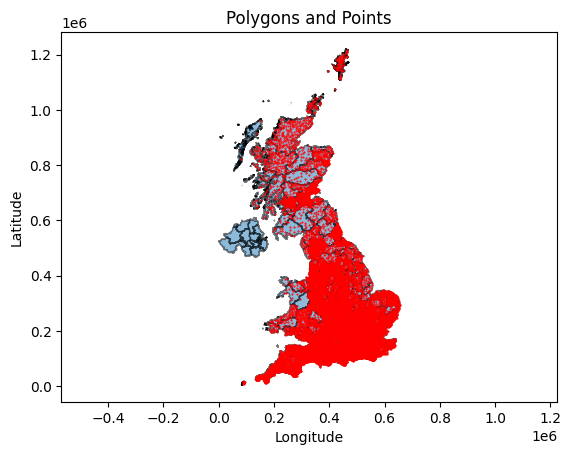

In [ ]:
points = []
polygons = []

for i in range(len(merged_data)):
    row = merged_data.iloc[i]
    points += place_n_points(row["geometry"], row["Con"]//100)
    polygons.append(row["geometry"])

plot_points_and_map(points, polygons, 1)

Read generated points from GeoJSON

In [9]:
geojson_file = './generated_points/green.geojson'
gdf = gpd.read_file(geojson_file)
points = gdf.geometry.tolist()

official_const = merged_data["geometry"].tolist()
print(points)
plot_points_and_map(points, official_const, 1)

# m = plot_points_and_map_interactive(points, official_const)
# m

DataSourceError: ./generated_points/green.geojson: No such file or directory

In [16]:
save_gdf = gpd.GeoDataFrame(geometry=points)
save_gdf.to_file("generated_points/ld.geojson", driver="GeoJSON")


/cs/home/jje4/Documents/CS4099/venv/lib64/python3.9/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
